# Import Libraries

In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split    
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Import & Explore Data

In [2]:
df = pd.read_csv('Time series Dataset.csv',  parse_dates=True, index_col='Date')

In [3]:
df

,Price,Open,Differnece,Close,High,Low,Vol,Change %
Date,,,,,,,,
2024-03-30,"70,126.60","69,872.30",251.54,"70,123.84","70,321.20","69,736.10",46160,0.36%
2024-03-29,"69,871.70","70,766.70",-891.66,"69,875.04","70,907.00","69,090.90",58990,-1.26%
2024-03-28,"70,762.10","69,449.40","1,319.54","70,768.94","71,542.50","68,956.90",72490,1.90%
2024-03-27,"69,442.40","69,999.20",-559.99,"69,439.21","71,670.80","68,428.60",112880,-0.80%
2024-03-26,"69,999.30","69,896.30",104.84,"70,001.14","71,490.70","69,366.40",90980,0.15%
...,...,...,...,...,...,...,...,...
2010-07-22,0.1,0.1,0,0.1,0.1,0.1,2160,0.00%
2010-07-21,0.1,0.1,0,0.1,0.1,0.1,580,0.00%
2010-07-20,0.1,0.1,0,0.1,0.1,0.1,260,0.00%


In [4]:

df.sort_index(inplace=True)

In [5]:
df.shape

(5005, 8)

In [6]:
df.columns

Index(['Price', 'Open', 'Differnece', 'Close', 'High', 'Low', 'Vol',
       'Change %'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5005 entries, 2010-07-18 to 2024-03-30
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Price       5005 non-null   object
 1   Open        5005 non-null   object
 2   Differnece  5005 non-null   object
 3   Close       5005 non-null   object
 4   High        5005 non-null   object
 5   Low         5005 non-null   object
 6   Vol         5005 non-null   int64 
 7   Change %    5005 non-null   object
dtypes: int64(1), object(7)
memory usage: 351.9+ KB


# Data Preprocessing

In [8]:
df["Price"] = df["Price"].str.replace(',','').astype('float64')
df["Open"] = df["Open"].str.replace(',','').astype('float64')
df["High"] = df["High"].str.replace(',','').astype('float64')
df["Low"] = df["Low"].str.replace(',','').astype('float64')
df["Close"] = df["Close"].str.replace(',','').astype('float64')

In [9]:
df.describe()

,Price,Open,Close,High,Low,Vol
count,5005.000000,5005.000000,5005.000000,5005.000000,5005.000000,5.005000e+03
mean,10883.350809,10869.312807,10883.427359,11139.464515,10581.619041,1.234727e+07
std,16014.453354,15993.002080,16014.561714,16393.299029,15566.401227,1.547973e+08
min,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000e+00
25%,227.200000,226.800000,227.210000,231.600000,222.000000,3.172000e+04
50%,2052.400000,2044.200000,2052.510000,2237.100000,1974.000000,6.874000e+04
75%,15695.800000,15632.100000,15694.860000,16287.900000,14832.400000,1.847200e+05
max,73066.300000,73066.700000,73055.500000,73740.900000,71338.400000,4.470000e+09


In [10]:
df.isna()

,Price,Open,Differnece,Close,High,Low,Vol,Change %
Date,,,,,,,,
2010-07-18,False,False,False,False,False,False,False,False
2010-07-19,False,False,False,False,False,False,False,False
2010-07-20,False,False,False,False,False,False,False,False
2010-07-21,False,False,False,False,False,False,False,False
2010-07-22,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2024-03-26,False,False,False,False,False,False,False,False
2024-03-27,False,False,False,False,False,False,False,False
2024-03-28,False,False,False,False,False,False,False,False


In [15]:
first_hundred_rows = df.head(100)  
df2 = df.drop(first_hundred_rows.index) 

In [16]:
df3 = df2.drop(columns=['Differnece', 'Change %'])

In [17]:
df3

,Price,Open,Close,High,Low,Vol
Date,,,,,,
2010-10-26,0.2,0.1,0.10,0.2,0.1,19220
2010-10-27,0.2,0.2,0.20,0.2,0.2,65610
2010-10-28,0.2,0.2,0.20,0.2,0.2,21530
2010-10-29,0.2,0.2,0.20,0.2,0.2,28690
2010-10-30,0.2,0.2,0.20,0.2,0.2,26710
...,...,...,...,...,...,...
2024-03-26,69999.3,69896.3,70001.14,71490.7,69366.4,90980
2024-03-27,69442.4,69999.2,69439.21,71670.8,68428.6,112880
2024-03-28,70762.1,69449.4,70768.94,71542.5,68956.9,72490


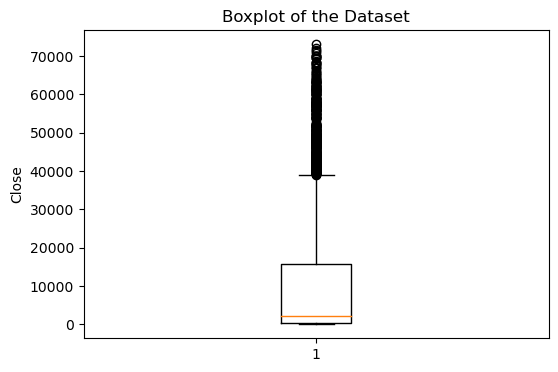

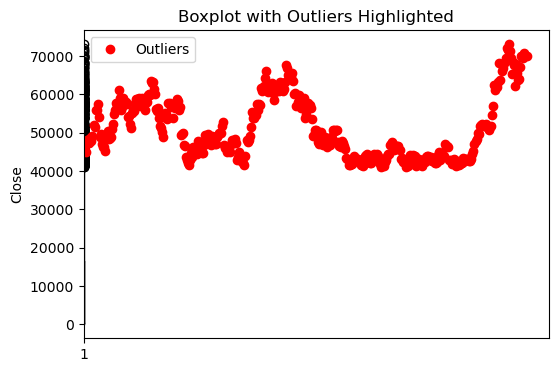

In [18]:

# Create a boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(df['Close'])
plt.ylabel('Close')
plt.title('Boxplot of the Dataset')
plt.show()

# Calculate outliers using the IQR method
Q1 = df3['Close'].quantile(0.25)
Q3 = df3['Close'].quantile(0.75)
IQR = Q3 - Q1

outliers = df3[(df3['Close'] < (Q1 - 1.5 * IQR)) | (df3['Close'] > (Q3 + 1.5 * IQR))]

# Reset the index of the outliers DataFrame
outliers = outliers.reset_index(drop=True)

# Highlight outliers on the boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(df3['Close'])
plt.plot(outliers.index + 1, outliers['Close'], 'ro', label='Outliers')
plt.ylabel('Close')
plt.title('Boxplot with Outliers Highlighted')
plt.legend()
plt.show()

In [19]:
# Assuming your data is in a NumPy array called 'data'
# Calculate quartiles
q1 = np.percentile(df3, 25)
q3 = np.percentile(df3, 75)

# Calculate IQR
iqr = q3 - q1

# Define outlier thresholds based on IQR (e.g., 1.5 times IQR)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outlier_indices = (df3 < lower_bound) | (df3 > upper_bound)

# Create a new array excluding outliers
data = df3[~outlier_indices]

In [20]:
data.dropna(inplace=True) 

In [21]:
print ("Data Duplicatioin")
print ("-"*30)
print(data.duplicated(keep=False).sum())


Data Duplicatioin
------------------------------
10


In [22]:
data = data.drop_duplicates(subset=['Price', 'Open', 'Close', 'High', 'Low', 'Vol'])

# Visualisation

In [23]:
def plotting(title, data, x, y, x_label, y_label):
    fig = px.line(data, x=data[x], y=data[y], labels={x: x_label, y: y_label})

    fig.update_layout(template="simple_white", font=dict(size=18),
                      title_text=title, width=650,
                      title_x=0.5, height=400)

    fig.show()

Text(0.5, 1.0, 'Bitcoin Price')

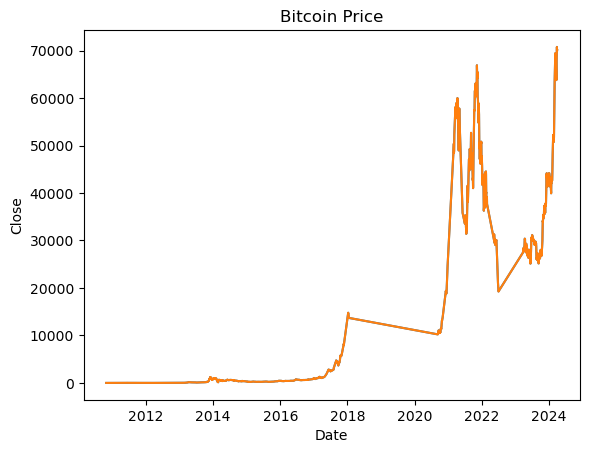

In [24]:
ax=sns.lineplot(data=data, x=data.index, y='Close')
ax=sns.lineplot(ax=ax, data=data, x=data.index, y='Price')
plt.ylabel('Close')
plt.title('Bitcoin Price')

# PreProcessing

In [25]:
target_column='Close'
print(data[target_column])

Date
2010-10-26        0.10
2010-10-27        0.20
2010-10-28        0.20
2010-10-29        0.20
2010-10-30        0.20
                ...   
2024-03-23    64040.74
2024-03-24    67212.71
2024-03-28    70768.94
2024-03-29    69875.04
2024-03-30    70123.84
Name: Close, Length: 2523, dtype: float64


In [26]:
def check_stationary(timeseries):
    adf_test = adfuller(timeseries,1)
    #access critical values from the 4th element of the tuple
    critical_values = adf_values = adf_test[4]
    
    print(f"ADF Statistics: {adf_test[0]:.4f}")
    print(f"p-value: {adf_test[1]:.4f}")
    print(f"Critical Values:")
    for key, value in critical_values.items():
        print(f"{key} ({value:4f})")

In [27]:
is_stationary = check_stationary(data[target_column])

ADF Statistics: 0.7074
p-value: 0.9900
Critical Values:
1% (-3.432946)
5% (-2.862687)
10% (-2.567380)


In [28]:
if not is_stationary:
    #apply differencing if necessary (may require multiple differencing steps)
    differenced_data = data[target_column].diff().dropna()
    is_stationary = check_stationary(differenced_data)

ADF Statistics: -36.8863
p-value: 0.0000
Critical Values:
1% (-3.432948)
5% (-2.862688)
10% (-2.567381)


# Data Split

In [29]:
split_index = int(len(data) * 0.8)
train_data = data[:split_index]
test_data = data[split_index:]
train_target = train_data[target_column]
test_target = test_data[target_column]

In [30]:
# Set frequency to 'D' for daily frequency
train_data = train_data.asfreq('D')

# ACF & PACF

In [31]:
from statsmodels.tsa.stattools import acf, pacf

In [32]:
def plot_acf_pacf(timeseries):
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10, 6))
    
    #calculate the ACF and PACF using statsmodels.tsa.stattools
    acf_values = acf(timeseries)
    pacf_values= pacf(timeseries)
    
    #crate logs list
    lags = np.arange(len(acf_values)) #create logs from 0 to length of ACF/PACF
    
    #Plot ACF with bars at logs
    ax1.bar(lags,acf_values)
    ax1.axhline(y=0,color='r',linestyle='--', alpha=0.7)
    ax1.axhline(y=1.96/np.sqrt(len(timeseries)),color='r',linestyle='--',alpha=0.7)
    ax1.axhline(y=-1.96/np.sqrt(len(timeseries)),color='r',linestyle='--',alpha=0.7)
    ax1.set_title('Autocorrelation Function')
    ax1.set_xlabel('lags')
    ax1.set_xticks(lags)
    
        
    ax2.bar(lags,pacf_values)
    ax2.axhline(y=0,color='r',linestyle='--', alpha=0.7)
    ax2.axhline(y=1.96/np.sqrt(len(timeseries)),color='r',linestyle='--',alpha=0.7)
    ax2.axhline(y=-1.96/np.sqrt(len(timeseries)),color='r',linestyle='--',alpha=0.7)
    ax2.set_title('Autocorrelation Function')
    ax2.set_xlabel('lags')
    ax2.set_xticks(lags)
    
    plt.tight_layout()
    plt.show

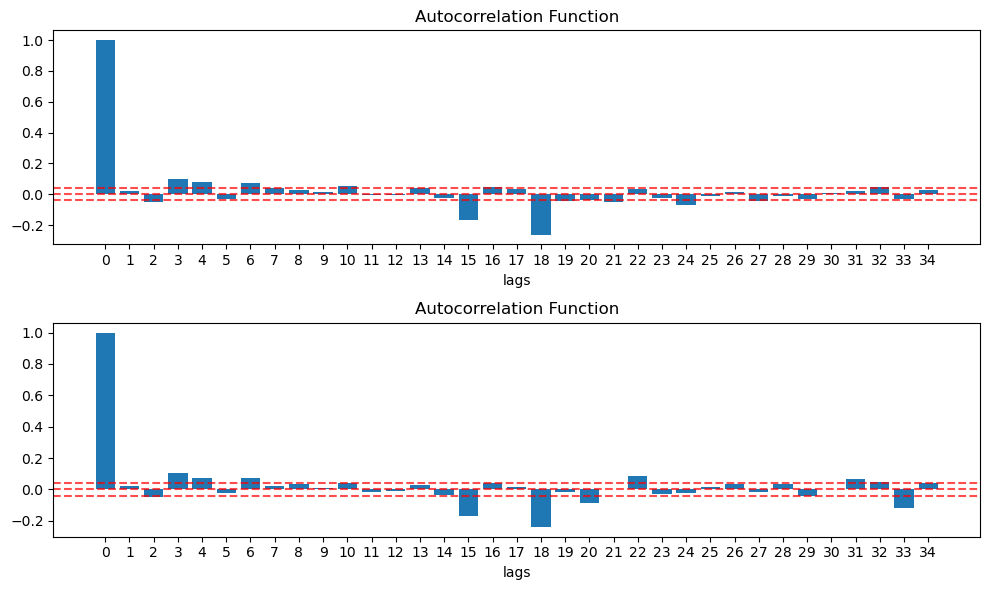

In [33]:
if is_stationary:
    plot_acf_pacf(Close)
else:
    plot_acf_pacf(differenced_data)

# ARIMA

In [34]:
# train_data_univariate = train_data[target_column] 
# model = ARIMA(train_data_univariate, order=(1,2,1)) 
train=df.iloc[:-1000]
test=df.iloc[-1000:]
model = ARIMA(train['Close'], order=(1,2,1)).fit()
model.summary()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4005
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -30610.666
Date:                Tue, 23 Apr 2024   AIC                          61227.332
Time:                        00:57:56   BIC                          61246.216
Sample:                    07-18-2010   HQIC                         61234.026
                         - 07-04-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0718      0.005    -13.960      0.000      -0.082      -0.062
ma.L1         -0.9999      0.001   -688.118      0.000      -1.003      -0.997
sigma2      2.563e+05   1150.335    222.808      0.000    2.54e+05    2.59e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):            507253.09
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):            1091.29   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        58.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# fitted_model = model.fit()

In [36]:
# predictions= fitted_model.predict(start=len(train_data), end=len(data[target_column]))
# predictions

In [37]:
start=len(train)
end=len(train)+len(test)-1

pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2021-07-05    35268.428894
2021-07-06    35280.158952
2021-07-07    35288.875511
2021-07-08    35297.808386
2021-07-09    35306.725732
                  ...     
2024-03-26    44144.847124
2024-03-27    44153.765511
2024-03-28    44162.683898
2024-03-29    44171.602285
2024-03-30    44180.520672
Freq: D, Name: ARIMA predictions, Length: 1000, dtype: float64

<Axes: xlabel='Date'>

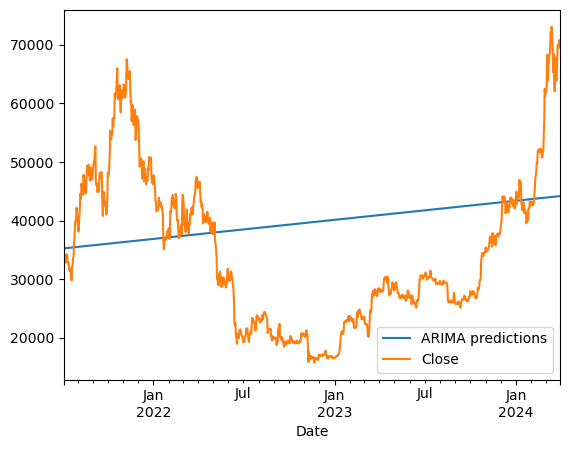

In [38]:
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [52]:
# Assuming your dataset is indexed by datetime objects
train = data.iloc[:-500]  # Assuming you want to use all but the last 500 rows for training
test = data.iloc[-500:]   # Assuming you want to use the last 500 rows for testing

# Use the index positions for start and end of test set
start_index = len(train)
end_index = len(train) + len(test) - 1

# Predict using ARIMA model
predictions = model.predict(start=start_index, end=end_index, typ='levels')[:len(test)]



In [51]:
# Check the length of test_target and predictions
print(f"Length of test_target: {len(test_target)}")
print(f"Length of predictions: {len(predictions)}")

# Ensure that the number of predictions matches the number of test data points
if len(predictions) != len(test_target):
    print("Warning: The number of predictions does not match the number of test data points!")
    # Generate predictions correctly matching the test data length
    predictions = model.forecast(steps=len(test_target))  # Correcting the steps parameter
    print(f"Corrected number of predictions: {len(predictions)}")


Length of test_target: 505
Length of predictions: 500
Corrected number of predictions: 505


In [57]:
start_index = len(train_data)  # Start forecasting right after the last training data point
end_index = start_index + len(test_target) - 1  # Ensure it includes all test data points

predictions = model.predict(start=start_index, end=end_index, typ='levels')


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
test_target = test_data[target_column]
mse = mean_squared_error(test_target, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_target, predictions)
mape = np.mean(np.abs((test_target - predictions) / test_target)) * 100  # MAPE in percentage

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")


Mean Squared Error (MSE): 618054861.6681
Root Mean Squared Error (RMSE): 24860.7092
Mean Absolute Error (MAE): 20118.6633
Mean Absolute Percentage Error (MAPE): 14.0631%


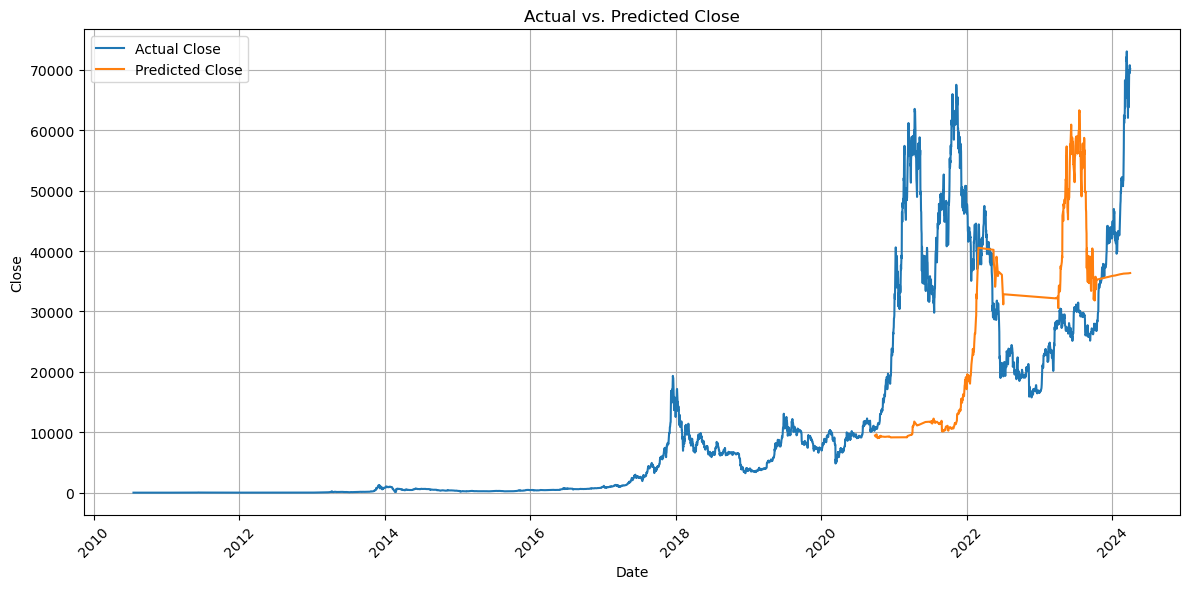

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Close')  # Assuming 'Close' is the column name
plt.plot(test_data.index, predictions, label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Actual vs. Predicted Close')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# SARIMA

In [64]:
!pip install statsmodels
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(data[target_column],order = (2,1,2),seasonal_order = (0,1,1,12))
model_fit = model.fit()
print(model_fit.summary())

Defaulting to user installation because normal site-packages is not writeable


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                 2523
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood              -20987.277
Date:                              Tue, 23 Apr 2024   AIC                          41986.553
Time:                                      02:00:36   BIC                          42021.521
Sample:                                           0   HQIC                         41999.246
                                             - 2523                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0007      1.878      0.000      1.000      -3.681       3.682
ar.L2          0.99

In [67]:
size = int(len(data) - 30)
train, test = data[target_column][0:size], data[target_column][size:len(data)]

print('\t SARIMA MODEL : In - Sample Forecasting \n')

history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = sm.tsa.statespace.SARIMAX(history,order = (2,1,2),seasonal_order = (0,1,1,12))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

	 SARIMA MODEL : In - Sample Forecasting 



C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 43685.413181, expected = 43195.720000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 43435.227315, expected = 43004.640000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 43279.432706, expected = 42580.440000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 42428.986419, expected = 42696.370000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 42568.485182, expected = 43086.150000
predicted = -73869.362121, expected = 44342.270000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 44224.511446, expected = 45299.640000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 45218.458018, expected = 47759.520000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 47808.090968, expected = 48279.880000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 48423.308675, expected = 52134.960000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 52099.795492, expected = 51644.140000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 52028.950331, expected = 52115.980000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 52630.950157, expected = 51786.030000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 51701.439158, expected = 52264.680000
predicted = 52438.536239, expected = 51855.840000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 51734.236416, expected = 51310.960000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 51502.747504, expected = 50740.680000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 50424.830078, expected = 51571.730000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 51442.053575, expected = 51721.660000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 51594.635482, expected = 61992.110000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 62371.581142, expected = 63095.580000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 63081.520717, expected = 68376.220000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 67759.919810, expected = 69433.960000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 69527.827024, expected = 68390.500000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 68373.353038, expected = 63785.360000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 63392.926379, expected = 64040.740000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 64316.373085, expected = 67212.710000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 67094.410873, expected = 70768.940000
predicted = 70881.022190, expected = 69875.040000


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 70189.232369, expected = 70123.840000


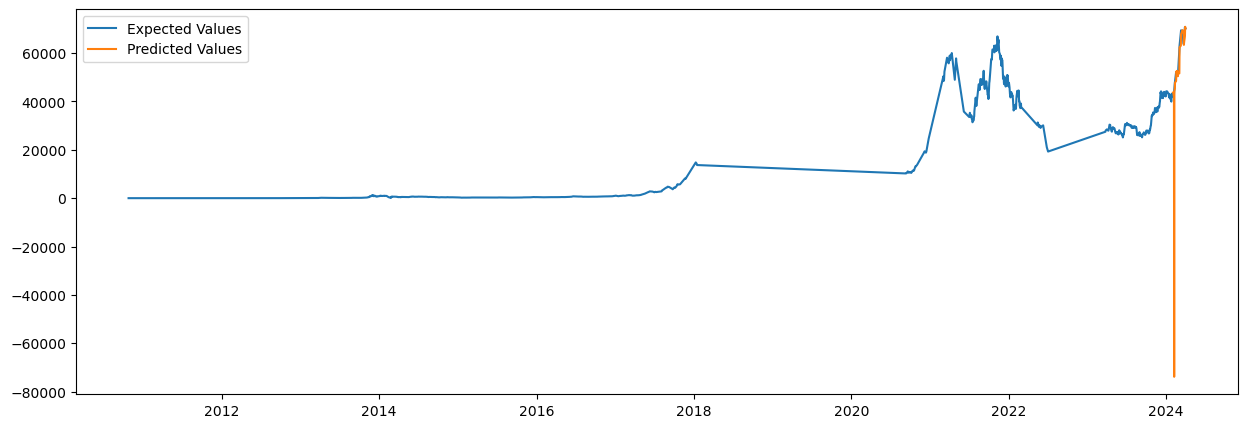

In [68]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(data[target_column],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [71]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
history_close_sarima = data['Close']

# Attempt to fit the SARIMA model with simplified settings and more robust convergence criteria
model_close_sarima_adjusted = SARIMAX(history_close_sarima, order=(0,1,1), seasonal_order=(0,1,1,12))
model_fit_close_sarima_adjusted = model_close_sarima_adjusted.fit(disp=False, maxiter=50, method='nm')  # Using Nelder-Mead method

# Forecast with the adjusted model
output_close_sarima_adjusted = model_fit_close_sarima_adjusted.forecast(steps=30)  # Forecasting the next 30 points directly
output_close_sarima_adjusted.head()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\sit

2523    69899.418573
2524    69915.783509
2525    70099.776460
2526    70501.409612
2527    70479.457745
Name: predicted_mean, dtype: float64

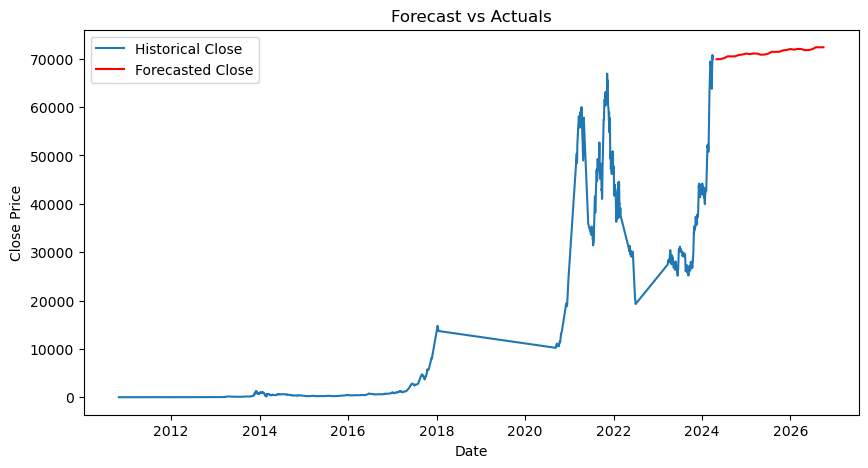

In [72]:
forecast_index = pd.date_range(start=history_close_sarima.index[-1], periods=31, freq='M')[1:]

plt.figure(figsize=(10, 5))
plt.plot(history_close_sarima.index, history_close_sarima, label='Historical Close')
plt.plot(forecast_index, output_close_sarima_adjusted, label='Forecasted Close', color='red')
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [73]:
error = np.sqrt(mean_squared_error(test,predictions))
print('Test RMSE: %.4f' % error)

Test RMSE: 21745.2925


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test, predictions)

# Calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test, predictions))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test, predictions)

# Print all error metrics
print('Test RMSE: %.4f' % rmse)
print('Test MAE: %.4f' % mae)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
print('Test MSE: %.4f' % mse)


Test RMSE: 21745.2925
Test MAE: 5522.2188
Mean Absolute Percentage Error (MAPE): 11.5644%
Test MSE: 472857745.6183


# VAR

In [77]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [78]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [79]:
data.columns

Index(['Price', 'Open', 'Close', 'High', 'Low', 'Vol'], dtype='object')

In [81]:
for name, column in data[['Open', 'High', 'Low', 'Close']].items():
    Augmented_Dickey_Fuller_Test_func(column, name)
    print('\n')


Results of Dickey-Fuller Test for column: Open
Test Statistic                    1.026444
p-value                           0.994537
No Lags Used                     23.000000
Number of Observations Used    2499.000000
Critical Value (1%)              -3.432969
Critical Value (5%)              -2.862697
Critical Value (10%)             -2.567386
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                    0.864314
p-value                           0.992606
No Lags Used                     22.000000
Number of Observations Used    2500.000000
Critical Value (1%)              -3.432968
Critical Value (5%)              -2.862697
Critical Value (10%)             -2.567386
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Results of Dickey-Fuller Test for column: Low
Test Statistic                    1.037742
p-value                        

In [85]:
# Apply differencing to each column in the DataFrame
data_diff = data[['Open', 'High', 'Low', 'Close']].diff().dropna()

In [86]:
# Print the first few rows of the differenced data to verify
print(data_diff.head())

            Open  High  Low  Close
Date                              
2010-10-27   0.1   0.0  0.1    0.1
2010-10-28   0.0   0.0  0.0    0.0
2010-10-29   0.0   0.0  0.0    0.0
2010-10-30   0.0   0.0  0.0    0.0
2010-10-31   0.0   0.0  0.0    0.0


In [88]:
# Now, perform the Dickey-Fuller test on the differenced data
for name, column in data_diff.items():
    Augmented_Dickey_Fuller_Test_func(column, name)
    print('\n')


Results of Dickey-Fuller Test for column: Open
Test Statistic                -1.290481e+01
p-value                        4.174604e-24
No Lags Used                   2.200000e+01
Number of Observations Used    2.499000e+03
Critical Value (1%)           -3.432969e+00
Critical Value (5%)           -2.862697e+00
Critical Value (10%)          -2.567386e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: High
Test Statistic                -1.305959e+01
p-value                        2.060574e-24
No Lags Used                   2.100000e+01
Number of Observations Used    2.500000e+03
Critical Value (1%)           -3.432968e+00
Critical Value (5%)           -2.862697e+00
Critical Value (10%)          -2.567386e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: Low
Test Statistic                -1.273157e+01
p-value                        9.350913e

In [89]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df): 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [90]:
cointegration_test(train_diff[['Open', 'High', 'Low', 'Close']])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Open   >  8519.47   > 40.1749   =>   True
High   >  4843.27   > 24.2761   =>   True
Low    >  2575.23   > 12.3212   =>   True
Close  >  627.97    > 4.1296    =>   True


Cointegration suggests that there is a stable long-term relationship among the variables

In [92]:
!pip install pmdarima

from pmdarima import auto_arima

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - ------------------------------------- 20.5/614.7 kB 330.3 kB/s eta 0:00:02
   ---- ---------------------------------- 71.7/614.7 kB 787.7 kB/s eta 0:00:01
   ------------- -------------------------- 215.0/614.7 kB 1.6 MB/s eta 0:00:01
   ----------------------------- ---------- 460.8/614.7 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 3.0 MB/s eta 0:00:01
   -----

In [94]:
pq = []
for name, column in train_diff[[ 'Open', 'High', 'Low', 'Close'  ]].items():
    print(f'Searching order of p and q for : {name}')
    stepwise_model = auto_arima(train_diff[name],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))



Searching order of p and q for : Open
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=78777.365, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=78776.206, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=78775.739, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=78775.816, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=78776.617, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=78771.849, Time=1.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=78771.855, Time=0.77 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=78749.835, Time=2.25 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=78771.513, Time=0.58 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=78775.763, Time=0.48 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=78751.868, Time=2.75 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=78771.493, Time=0.77 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=78757.915, Time=3.18 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=78763.

In [95]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res


In [96]:
pq

[(2, 0, 2), (1, 0, 0), (0, 0, 0), (2, 0, 4)]

In [98]:

import time

df_results_moni = pd.DataFrame(columns=['p', 'q','RMSE Open','RMSE High','RMSE Low','RMSE Close'])
print('Grid Search Started')
start = time.time()  # Use time.time() to start the timer
for i in pq:
    if i[0]== 0 and i[2] ==0:
        continue
    try:
        model = ARIMA(train_diff['Open'], order=(i[0],1,i[2])).fit(disp=0)
        predictions = model.predict(start=len(train_diff), end=len(train_diff)+len(test_diff)-1, typ='levels')
        df_results_moni = df_results_moni.append({'p': i[0], 'q': i[2],
                                                  'RMSE Open':np.sqrt(mean_squared_error(test_diff['Open'], predictions)),
                                                  'RMSE High': np.sqrt(mean_squared_error(test_diff['High'],predictions)),
                                                  'RMSE Low': np.sqrt(mean_squared_error(test_diff['Low'],predictions)),
                                                  'RMSE Close':np.sqrt(mean_squared_error(test_diff['Close'],predictions))}, ignore_index=True)
    except:
        continue

end = time.time()  # Use time.time() to end the timer
print(f"Grid Search Finished in {end - start} seconds")  # Print the elapsed time


Grid Search Started
Grid Search Finished in 0.020300626754760742 seconds


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

In [100]:
df_results_moni.sort_values(by=['RMSE Open', 'RMSE High', 'RMSE Low', 'RMSE Close'], ascending=False)


,p,q,RMSE Open,RMSE High,RMSE Low,RMSE Close


In [102]:
# from above example we can see that p=0 and q=2 gives least RMSE
from statsmodels.tsa.statespace.varmax import VARMAX  # Import VARMAX model class

# Define and fit the VARMAX model
model = VARMAX(train_diff[['Open', 'High', 'Low', 'Close']], order=(0, 2)).fit(disp=False)
result = model.forecast(steps=30)  # Forecast future steps

# Print the forecast result
print(result)


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                   Open         High          Low       Close
2024-03-01 -1244.712047 -1241.060828 -1070.495508 -907.374454
2024-03-02  -901.631691  -126.701965  -620.460871   44.253227
2024-03-03    12.544060    12.797551    12.166049   12.311508
2024-03-04    12.544060    12.797551    12.166049   12.311508
2024-03-05    12.544060    12.797551    12.166049   12.311508
2024-03-06    12.544060    12.797551    12.166049   12.311508
2024-03-07    12.544060    12.797551    12.166049   12.311508
2024-03-08    12.544060    12.797551    12.166049   12.311508
2024-03-09    12.544060    12.797551    12.166049   12.311508
2024-03-10    12.544060    12.797551    12.166049   12.311508
2024-03-11    12.544060    12.797551    12.166049   12.311508
2024-03-12    12.544060    12.797551    12.166049   12.311508
2024-03-13    12.544060    12.797551    12.166049   12.311508
2024-03-14    12.544060    12.797551    12.166049   12.311508
2024-03-15    12.544060    12.797551    12.166049   12.311508
2024-03-

In [103]:
res = inverse_diff(df[['Open', 'High', 'Low', 'Close' ]],result)

In [104]:
res

,Open,High,Low,Close,Open_1st_inv_diff,High_1st_inv_diff,Low_1st_inv_diff,Close_1st_inv_diff
2024-03-01,-1244.712047,-1241.060828,-1070.495508,-907.374454,68627.587953,69080.139172,68665.604492,69216.465546
2024-03-02,-901.631691,-126.701965,-620.460871,44.253227,67725.956262,68953.437206,68045.143621,69260.718773
2024-03-03,12.544060,12.797551,12.166049,12.311508,67738.500322,68966.234757,68057.309669,69273.030281
2024-03-04,12.544060,12.797551,12.166049,12.311508,67751.044382,68979.032308,68069.475718,69285.341789
2024-03-05,12.544060,12.797551,12.166049,12.311508,67763.588442,68991.829859,68081.641766,69297.653296
2024-03-06,12.544060,12.797551,12.166049,12.311508,67776.132502,69004.627410,68093.807815,69309.964804
2024-03-07,12.544060,12.797551,12.166049,12.311508,67788.676563,69017.424961,68105.973864,69322.276312
2024-03-08,12.544060,12.797551,12.166049,12.311508,67801.220623,69030.222512,68118.139912,69334.587820
2024-03-09,12.544060,12.797551,12.166049,12.311508,67813.764683,69043.020063,68130.305961,69346.899327
2024-03-10,12.544060,12.797551,12.166049,12.311508,67826.308743,69055.817614,68142.472009,69359.210835


In [107]:
from sklearn import metrics  # Import the metrics module

# Define a function to calculate evaluation metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    """
    Function to calculate evaluation metrics.
    """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print evaluation metrics for each column
for i in ['Open', 'High', 'Low', 'Close']:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)], res[str(i)+'_1st_inv_diff'])

    # Calculate and print additional metrics
    print('Evaluation metric results:-')
    
    print(f'MSE is : {metrics.mean_squared_error(test[str(i)], res[str(i)+"_1st_inv_diff"])}')
    
    print(f'MAE is : {metrics.mean_absolute_error(test[str(i)], res[str(i)+"_1st_inv_diff"])}')
    
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(test[str(i)], res[str(i)+"_1st_inv_diff"]))}')
    
    # Calculate MAPE
    mape = np.mean(np.abs((test[str(i)] - res[str(i)+'_1st_inv_diff']) / test[str(i)])) * 100
    print(f'MAPE is : {mape}%')

Evaluation metric for Open
Evaluation metric results:-
MSE is : 11169809.359443406
MAE is : 2701.5229361155452
RMSE is : 3342.1264726882205
MAPE is : 4.099161234920149%
Evaluation metric for High
Evaluation metric results:-
MSE is : 8119940.168113697
MAE is : 2221.402609888639
RMSE is : 2849.550871297738
MAPE is : 3.2482488961112534%
Evaluation metric for Low
Evaluation metric results:-
MSE is : 17460904.45336362
MAE is : 3313.103714251193
RMSE is : 4178.624708365614
MAPE is : 5.247567341360345%
Evaluation metric for Close
Evaluation metric results:-
MSE is : 12742331.138760826
MAE is : 2723.899771430193
RMSE is : 3569.6401973813586
MAPE is : 4.17095276033819%


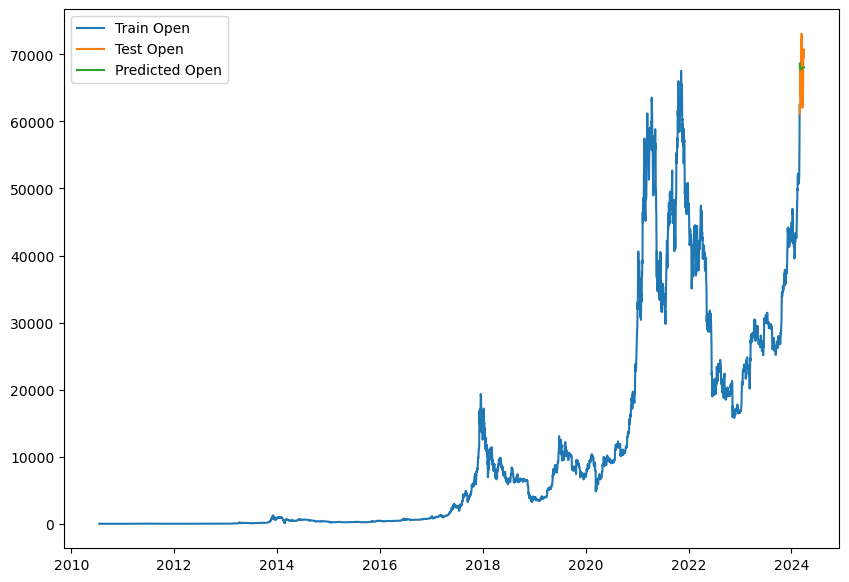

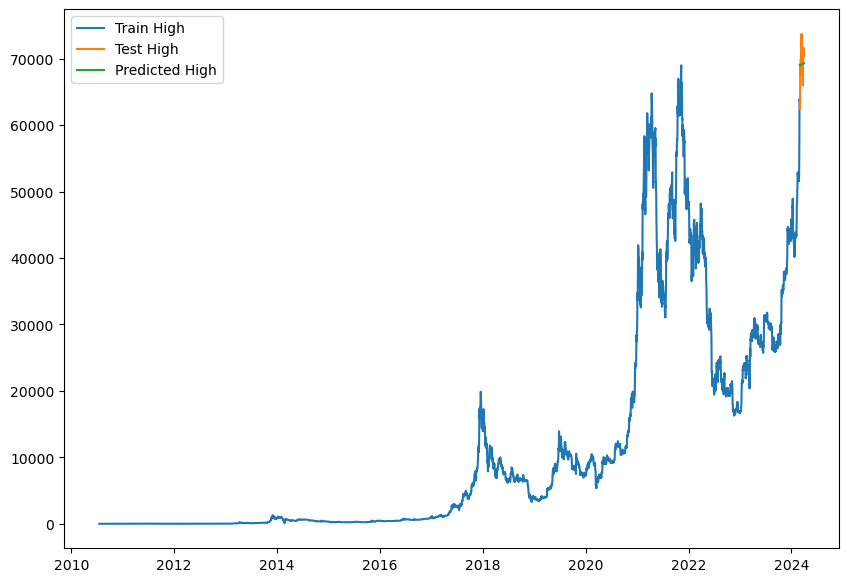

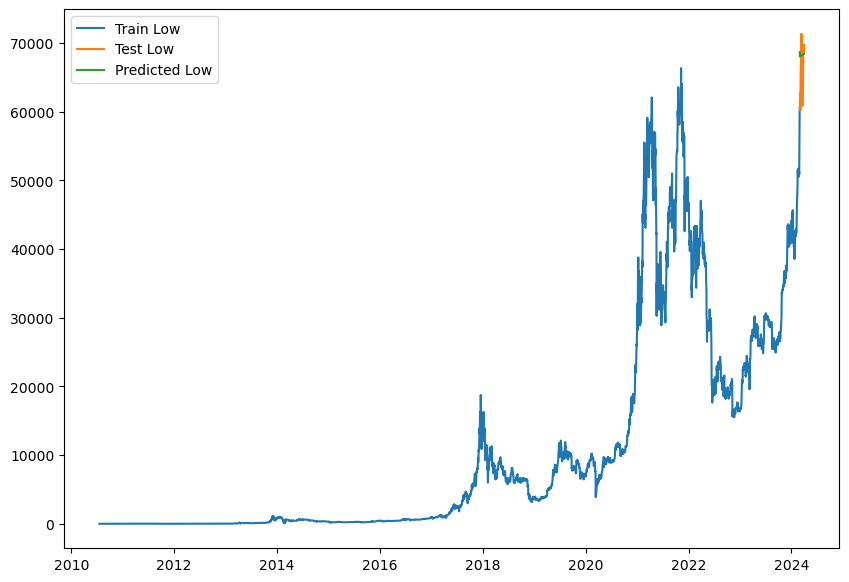

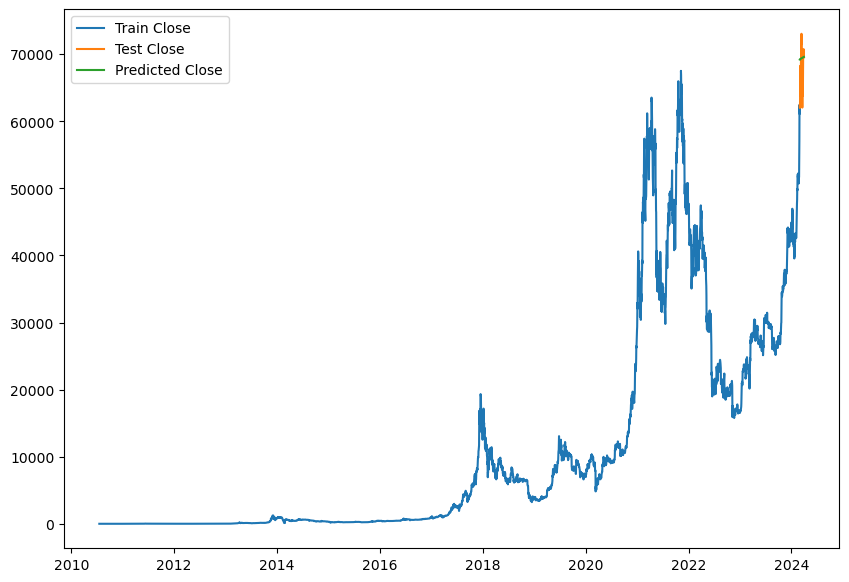

In [108]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in ['Open', 'High', 'Low', 'Close' ]:
    
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(res[str(i)+'_1st_inv_diff'], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()